### Mackenzie Frackleton
### Brenna Manning
## Data Science 2016 Final Project

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

#LOAD DATA
df = pd.read_csv('Kwadella_winter_2013_cleaned.csv')
print df.info()
df2 = pd.read_csv('Kwadella_winter_2014_cleaned.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125475 entries, 0 to 125474
Data columns (total 24 columns):
Unnamed: 0            125475 non-null int64
Dusttraks_(mg/m3)     116559 non-null float64
PM10_(ug/m3)          64669 non-null float64
PM2.5_(ug/m3)         79939 non-null float64
SO2_(ppb)             86106 non-null float64
CO_(ppm)              18618 non-null float64
NO_(ppb)              65526 non-null float64
NO2_(ppb)             65661 non-null float64
Date                  125475 non-null object
Temperature_(degC)    101947 non-null float64
H01-K-E               125288 non-null float64
H02-K-N               105235 non-null float64
H03-K-S               125304 non-null float64
H04-K-S               125275 non-null float64
H05-K-N               122834 non-null float64
H06-K-N               125353 non-null float64
H07-K-S               81779 non-null float64
H10-K-N               125297 non-null float64
H11-K-X               113919 non-null float64
H12-K-N               125

/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#SOME HELPER FUNCTIONS
def get_datetime(s):
    dt = datetime.strptime(s, "%m/%d/%y %H:%M")
    return dt

def preprocess(df):
    res = df.copy()
    datetimes = res.Date.apply(get_datetime)
    res['Hour'] = datetimes.apply(lambda dt: dt.hour)
    res['Day'] = datetimes.apply(lambda dt: dt.day)
    res['Month'] = datetimes.apply(lambda dt: dt.month)
    res['Year'] = datetimes.apply(lambda dt: dt.year)
    return res

def daysSinceStart(df):
    #get time since epoch
    dayArray = np.array(df.Day)
    monthArray = np.array(df.Month)
    
    runningDays = []
    for day, month in zip(dayArray, monthArray):
        if month == 7:
            total_days = 0
            #do nothing, append the normal day
        elif month == 8:
            total_days = 31 
        elif month == 9:
            total_days = 61
        else:
            raise ValueError 
        total_days = total_days + day
        #print'tot days:', total_days, month, day
        runningDays.append(total_days)
    df['DayCount'] = pd.Series(runningDays, index = df.index)
    return df


#Daily Average Temp
def compute_avg_temp(df):
    df['DailyAverageTemp'] = df['Temperature_(degC)'].mean()
    return df




In [3]:
df = preprocess(df)
df = daysSinceStart(df)
grouped = df.groupby('DayCount')
df = grouped.apply(compute_avg_temp)


#### Some Diurnal Plots

In [4]:
#GENERAL FUNCTION FOR DIURNAL PLOTS

def getmeanfeatureforhour (hourdf, feature):
    res = hourdf[feature].mean()
    return res
def featurehourplot(df, feature, title):
    #feature for example could be a temperature or pollutant concentration
    dfhour0 = df[df['Hour'] == 0]
    feat0 = getmeanfeatureforhour(dfhour0, feature)
    dfhour1 = df[df['Hour'] == 1]
    feat1= getmeanfeatureforhour(dfhour1, feature)
    dfhour2 = df[df['Hour'] == 2]
    feat2 = getmeanfeatureforhour(dfhour2, feature)
    dfhour3 = df[df['Hour'] == 3]
    feat3 = getmeanfeatureforhour(dfhour3, feature)
    dfhour4 = df[df['Hour'] == 4]
    feat4 = getmeanfeatureforhour(dfhour4, feature)
    dfhour5 = df[df['Hour'] == 5]
    feat5 = getmeanfeatureforhour(dfhour5, feature)
    dfhour6 = df[df['Hour'] == 6]
    feat6 = getmeanfeatureforhour(dfhour6, feature)
    dfhour7 = df[df['Hour'] == 7]
    feat7 = getmeanfeatureforhour(dfhour7, feature)
    dfhour8 = df[df['Hour'] == 8]
    feat8 = getmeanfeatureforhour(dfhour8, feature)
    dfhour9 = df[df['Hour'] == 9]
    feat9 = getmeanfeatureforhour(dfhour9, feature)
    dfhour10 = df[df['Hour'] == 10]
    feat10 = getmeanfeatureforhour(dfhour10, feature)
    dfhour11 = df[df['Hour'] == 11]
    feat11 = getmeanfeatureforhour(dfhour11, feature)
    dfhour12 = df[df['Hour'] == 12]
    feat12 = getmeanfeatureforhour(dfhour12, feature)
    dfhour13 = df[df['Hour'] == 13]
    feat13 = getmeanfeatureforhour(dfhour13, feature)
    dfhour14 = df[df['Hour'] == 14]
    feat14 = getmeanfeatureforhour(dfhour14, feature)
    dfhour15 = df[df['Hour'] == 15]
    feat15 = getmeanfeatureforhour(dfhour15, feature)
    dfhour16 = df[df['Hour'] == 16]
    feat16 = getmeanfeatureforhour(dfhour16, feature)
    dfhour17 = df[df['Hour'] == 17]
    feat17 = getmeanfeatureforhour(dfhour17, feature)
    dfhour18 = df[df['Hour'] == 18]
    feat18 = getmeanfeatureforhour(dfhour18, feature)
    dfhour19 = df[df['Hour'] == 19]
    feat19 = getmeanfeatureforhour(dfhour19, feature)
    dfhour20 = df[df['Hour'] == 20]
    feat20 = getmeanfeatureforhour(dfhour20, feature)
    dfhour21 = df[df['Hour'] == 21]
    feat21 = getmeanfeatureforhour(dfhour21, feature)
    dfhour22 = df[df['Hour'] == 22]
    feat22 = getmeanfeatureforhour(dfhour22, feature)
    dfhour23 = df[df['Hour'] == 23]
    feat23 = getmeanfeatureforhour(dfhour23, feature)

    hourlist = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    featlist = [feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23]
    plt.plot(hourlist, featlist, label=title)
    plt.legend
    plt.xlabel('Hour')
    if feature[0:1] == 'H0':
        plt.ylabel('House Temp, Degrees C')
    else:
        plt.ylabel(feature)
    plt.title(title)



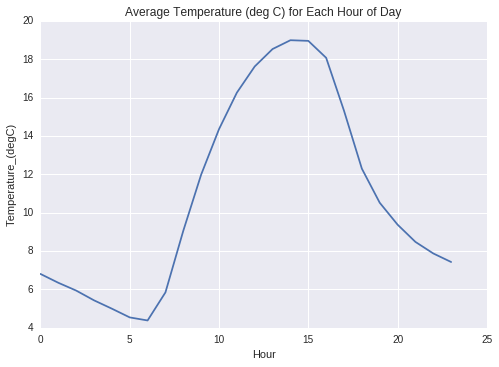

In [5]:
featurehourplot(df, 'Temperature_(degC)', 'Average Temperature (deg C) for Each Hour of Day')

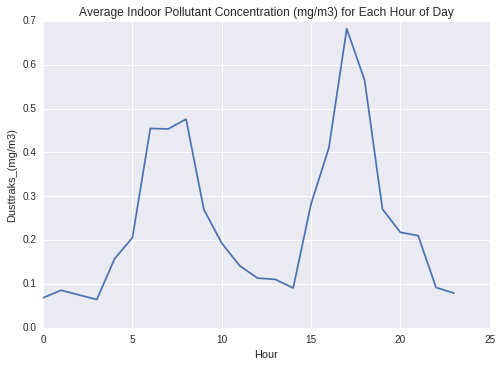

In [6]:
featurehourplot(df, 'Dusttraks_(mg/m3)', 'Average Indoor Pollutant Concentration (mg/m3) for Each Hour of Day')

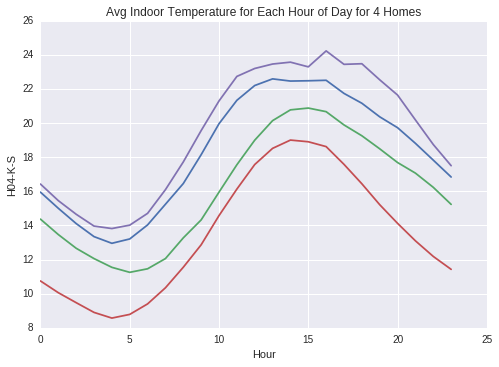

In [7]:
featurehourplot(df, 'H01-K-E', '')
featurehourplot(df, 'H02-K-N', '')
featurehourplot(df, 'H03-K-S', '')
featurehourplot(df, 'H04-K-S', 'Avg Indoor Temperature for Each Hour of Day for 4 Homes')

### Some Seasonal Plots

Daily Average Outdoor Temperatures

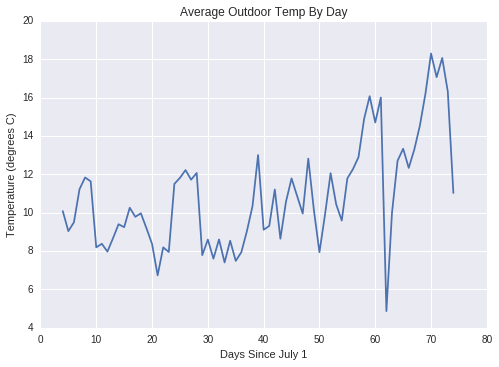

In [8]:
plt.plot(df['DayCount'], df['DailyAverageTemp'])
plt.title('Average Outdoor Temp By Day')
plt.xlabel('Days Since July 1')
plt.ylabel('Temperature (degrees C)')

Daily Average Indoor Temperatures (House 1)

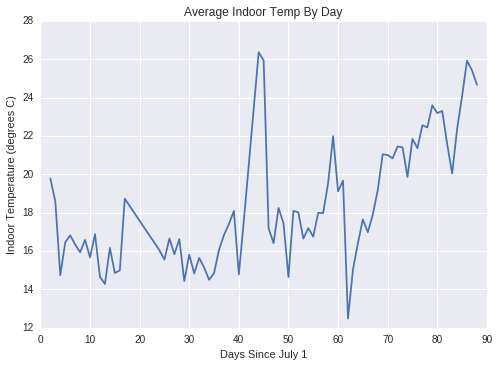

In [9]:
def compute_avg_temp(df):
    df['DailyAverageTempH01KE'] = df['H01-K-E'].mean()
    return df

grouped = df.groupby('DayCount')
df = grouped.apply(compute_avg_temp)

df.head()

plt.plot(df['DayCount'], df['DailyAverageTempH01KE'])
plt.title('Average Indoor Temp By Day')
plt.xlabel('Days Since July 1')
plt.ylabel('Indoor Temperature (degrees C)')

Daily Average Indoor Pollutant Concentration

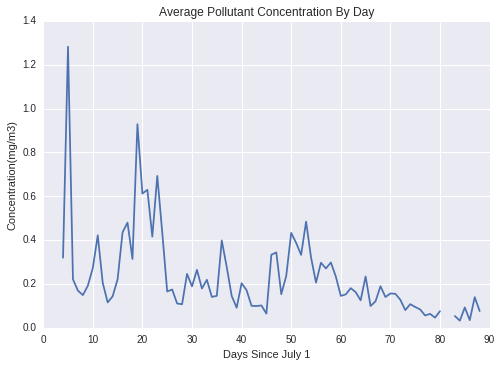

In [10]:
def compute_avg_dusttraks(df):
    df['DailyAvgDusttraks'] = df['Dusttraks_(mg/m3)'].mean()
    return df

grouped = df.groupby('DayCount')
df = grouped.apply(compute_avg_dusttraks)

df.head()

plt.plot(df['DayCount'], df['DailyAvgDusttraks'])
plt.title('Average Pollutant Concentration By Day')
plt.xlabel('Days Since July 1')
plt.ylabel('Concentration(mg/m3)')


### Temperature and Pollutant Concentration Over Time

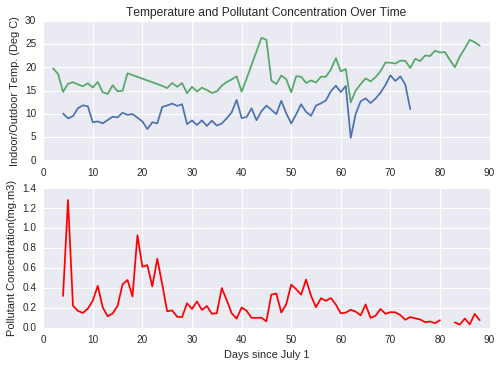

In [11]:
plt.figure(1)

plt.subplot(211)
plt.title('Temperature and Pollutant Concentration Over Time')
plt.plot(df['DayCount'], df['DailyAverageTemp'])
plt.plot(df['DayCount'], df['DailyAverageTempH01KE'])
plt.ylabel('Indoor/Outdoor Temp. (Deg C)')

plt.subplot(212)
plt.plot(df['DayCount'], df['DailyAvgDusttraks'], '-r')
plt.xlabel('Days since July 1')
plt.ylabel('Pollutant Concentration(mg.m3)')
plt.show()



### Outdoor Pollution

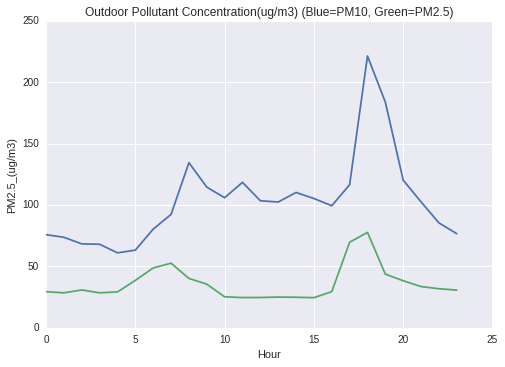

In [12]:
featurehourplot(df, 'PM10_(ug/m3)', 'Outdoor Pollutant Concentration(ug/m3)')
featurehourplot(df, 'PM2.5_(ug/m3)', 'Outdoor Pollutant Concentration(ug/m3)')
plt.title('Outdoor Pollutant Concentration(ug/m3) (Blue=PM10, Green=PM2.5)')
plt.show()

          


## Now let's explore the differences between warm days and cold days!
For now, warm days are days where the temperature was above average for the winter, and cold days are days where the temperature was below average for the winter.

###### Let's get the average indoor temperature from the homes we collected data from

In [13]:
def compute_avg_indoortemp(df):
    df['AvgHouse'] = df['H01-K-E']
    return df

df = compute_avg_indoortemp(df)

Create warm and cold dataframes for days above and below the average temperature of the winter

In [14]:
def compute_avg_temp(df):
    df['DailyAvgTemp'] = df['Temperature_(degC)'].mean()
    return df

grouped = df.groupby('DayCount')
df = grouped.apply(compute_avg_temp)



def getwarmdf(df):
    tempmean = df['DailyAvgTemp'].mean()
    warmdf = df[df['DailyAvgTemp'] >= tempmean]
    return warmdf
def getcolddf(df):
    tempmean = df['DailyAvgTemp'].mean()
    colddf = df[df['DailyAvgTemp'] < tempmean]
    return colddf
dfwarm = getwarmdf(df)
dfcold = getcolddf(df)


Using the warm days and cold days data frames, we can see the same diurnal plots as above but separately for warm and cold days.

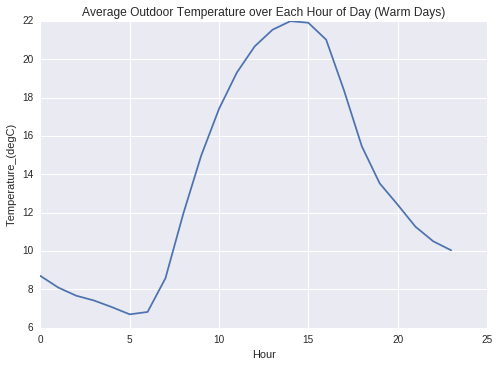

In [15]:
featurehourplot(dfwarm, 'Temperature_(degC)', 'Average Outdoor Temperature over Each Hour of Day (Warm Days)')

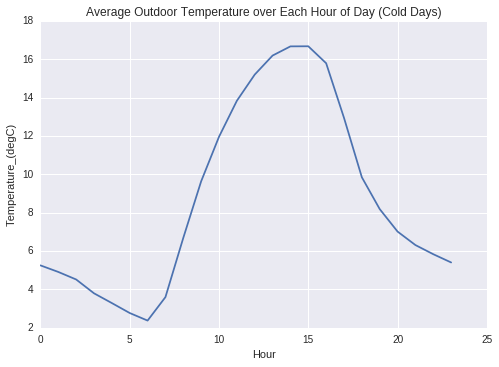

In [16]:
featurehourplot(dfcold, 'Temperature_(degC)', 'Average Outdoor Temperature over Each Hour of Day (Cold Days)')

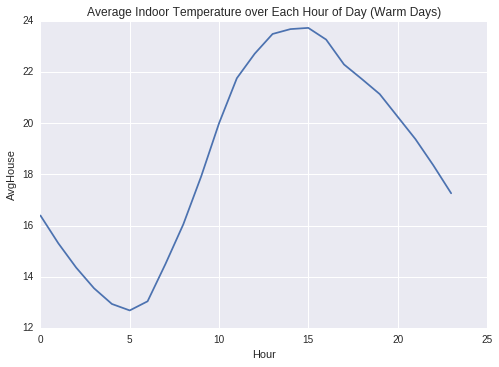

In [17]:
featurehourplot(dfwarm, 'AvgHouse', 'Average Indoor Temperature over Each Hour of Day (Warm Days)')

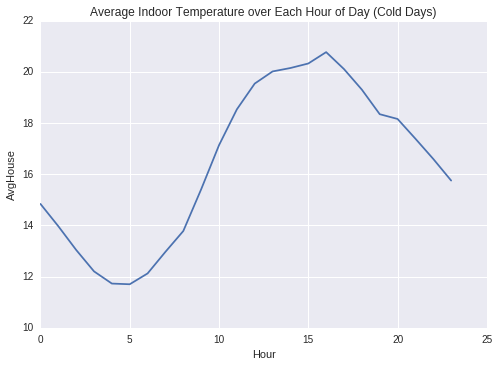

In [18]:
featurehourplot(dfcold, 'AvgHouse', 'Average Indoor Temperature over Each Hour of Day (Cold Days)')

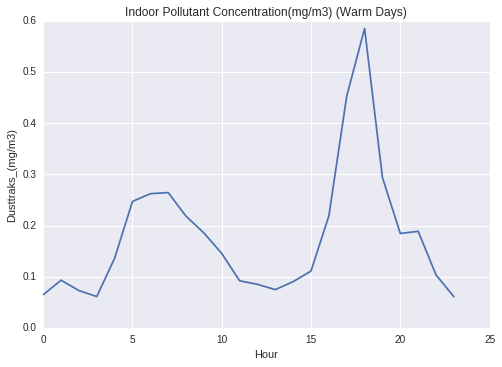

In [19]:
featurehourplot(dfwarm, 'Dusttraks_(mg/m3)', 'Indoor Pollutant Concentration(mg/m3) (Warm Days)')

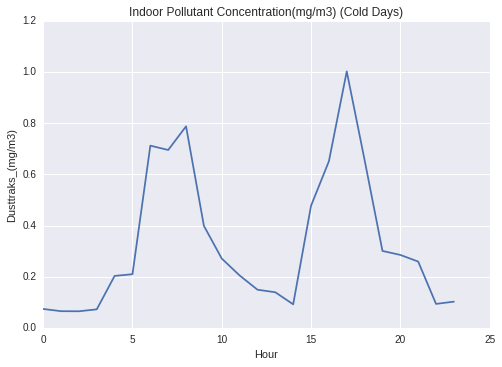

In [20]:
featurehourplot(dfcold, 'Dusttraks_(mg/m3)', 'Indoor Pollutant Concentration(mg/m3) (Cold Days)')

### Warm and Cold Days Together

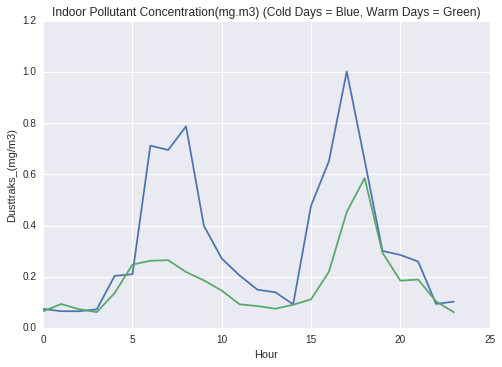

In [21]:
featurehourplot(dfcold, 'Dusttraks_(mg/m3)', 'Indoor Pollutant Concentration(mg/m3) (Cold Days)')
featurehourplot(dfwarm, 'Dusttraks_(mg/m3)', 'Indoor Pollutant Concentration(mg/m3) (Warm Days)')
plt.title('Indoor Pollutant Concentration(mg.m3) (Cold Days = Blue, Warm Days = Green)')
plt.show()


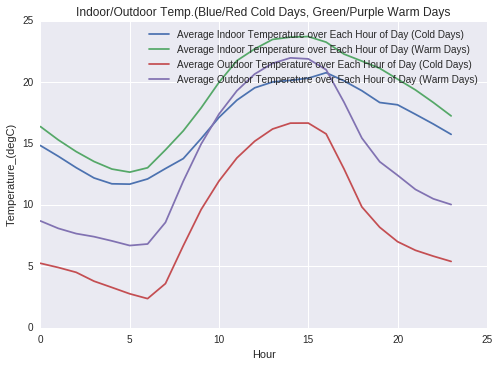

In [22]:
featurehourplot(dfcold, 'AvgHouse', 'Average Indoor Temperature over Each Hour of Day (Cold Days)')
featurehourplot(dfwarm, 'AvgHouse', 'Average Indoor Temperature over Each Hour of Day (Warm Days)')
featurehourplot(dfcold, 'Temperature_(degC)', 'Average Outdoor Temperature over Each Hour of Day (Cold Days)')
featurehourplot(dfwarm, 'Temperature_(degC)', 'Average Outdoor Temperature over Each Hour of Day (Warm Days)')
plt.title('Indoor/Outdoor Temp.(Blue/Red Cold Days, Green/Purple Warm Days')
plt.legend()
plt.show()


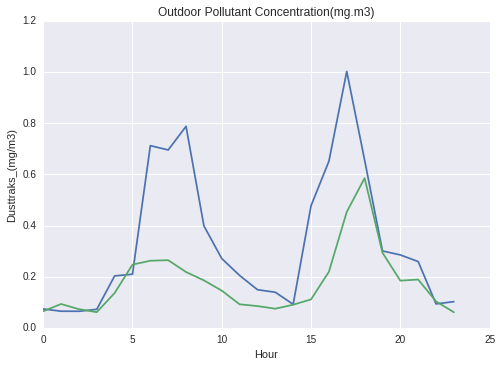

In [23]:
featurehourplot(dfcold, 'Dusttraks_(mg/m3)', 'Indoor Pollutant Concentration(mg/m3) (Cold Days)')
featurehourplot(dfwarm, 'Dusttraks_(mg/m3)', 'Indoor Pollutant Concentration(mg/m3) (Warm Days)')
plt.title('Outdoor Pollutant Concentration(mg.m3)')
plt.show()


### Now let's take a look at specific times of day!
For now, we will define morning as between 5 and 9 am, and we will define dinnertime as between 5 and 7 pm. 

In [26]:
def tempdifference(df, house):
    df['tempdifference'] = df[house]
    df['tempdifference'] = df[house]-df['Temperature_(degC)']
    return df
  
df = tempdifference(df, 'H01-K-E')

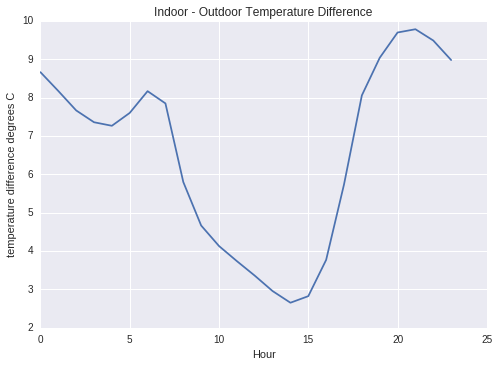

In [25]:
featurehourplot(df, 'tempdifference', 'Indoor - Outdoor Temperature Difference')
plt.ylabel('temperature difference degrees C')
plt.show()